In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import corner as corner
from gwpopulation.utils import powerlaw
import glob
import corner as corner
import os
import matplotlib.lines as mlines

/cvmfs/software.igwn.org/conda/envs/igwn/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
result_PL=h5py.File('O1O2O3_powerlawm2min_prod_fewerevents/result/bbh_mass_two_component_primary_mass_ratio_powerlaw_m2min_redshift_powerlaw_result.hdf5')
result_PL_no190814=h5py.File('O1O2O3_powerlawm2min_prod_fewerevents_no190814/result/bbh_mass_two_component_primary_mass_ratio_powerlaw_m2min_redshift_powerlaw_result.hdf5')

result_parabola=h5py.File('O1O2O3_parabolam2min_prod_condgammazeta_fewerevents/result/bbh_mass_parabola_m2min_allgammazeta_redshift_powerlaw_result.hdf5')
result_parabola_no190814=h5py.File('O1O2O3_parabolam2min_prod_condgammazeta_no190814/result/bbh_mass_parabola_m2min_allgammazeta_redshift_powerlaw_result.hdf5')

result_PLPP=h5py.File('O1O2O3_PLPP_fewevents/result/bbh_mass_two_component_primary_mass_ratio_redshift_powerlaw_result.hdf5')
result_PLPP_no190814=h5py.File('O1O2O3_PLPP_fewevents_no190814/result/bbh_mass_two_component_primary_mass_ratio_redshift_powerlaw_result.hdf5')

In [4]:
PL_result_dict = {'alpha':result_PL['posterior']['alpha'], 
                         'beta':result_PL['posterior']['beta'], 
                         'gamma':result_PL['posterior']['gamma'],
                         'mmin': result_PL['posterior']['mmin'], 
                         'mmax': result_PL['posterior']['mmax']}
PL_no190814_result_dict = {'alpha':result_PL_no190814['posterior']['alpha'], 
                         'beta':result_PL_no190814['posterior']['beta'], 
                         'gamma':result_PL_no190814['posterior']['gamma'],
                         'mmin': result_PL_no190814['posterior']['mmin'], 
                         'mmax': result_PL_no190814['posterior']['mmax']}
parabola_result_dict = {'alpha':result_parabola['posterior']['alpha'], 
                         'beta':result_parabola['posterior']['beta'], 
                         'gamma':result_parabola['posterior']['gamma'],
                         'zeta':result_parabola['posterior']['zeta'],
                         'mmin': result_parabola['posterior']['mmin'], 
                         'mmax': result_parabola['posterior']['mmax']}
parabola_no190814_result_dict = {'alpha':result_parabola_no190814['posterior']['alpha'], 
                         'beta':result_parabola_no190814['posterior']['beta'], 
                         'gamma':result_parabola_no190814['posterior']['gamma'],
                         'zeta':result_parabola_no190814['posterior']['zeta'],
                         'mmin': result_parabola_no190814['posterior']['mmin'], 
                         'mmax': result_parabola_no190814['posterior']['mmax']}
PLPP_result_dict = {'alpha':result_PLPP['posterior']['alpha'], 
                         'beta':result_PLPP['posterior']['beta'], 
                         'mmin': result_PLPP['posterior']['mmin'], 
                         'mmax': result_PLPP['posterior']['mmax']}
PLPP_no190814_result_dict = {'alpha':result_PLPP_no190814['posterior']['alpha'], 
                         'beta':result_PLPP_no190814['posterior']['beta'], 
                         'mmin': result_PLPP_no190814['posterior']['mmin'], 
                         'mmax': result_PLPP_no190814['posterior']['mmax']}

In [54]:
corner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color="darkslategrey",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=False,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\alpha$',r'$\beta$',r'$\gamma$', r'$m_{\rm max}$', r'$m_{\rm min}$'],
)

no190814corner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color="mediumseagreen",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=False,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=16),
    labels=[r'$\alpha$',r'$\beta$',r'$\gamma$', r'$m_{\rm max}$', r'$m_{\rm min}$'],
)

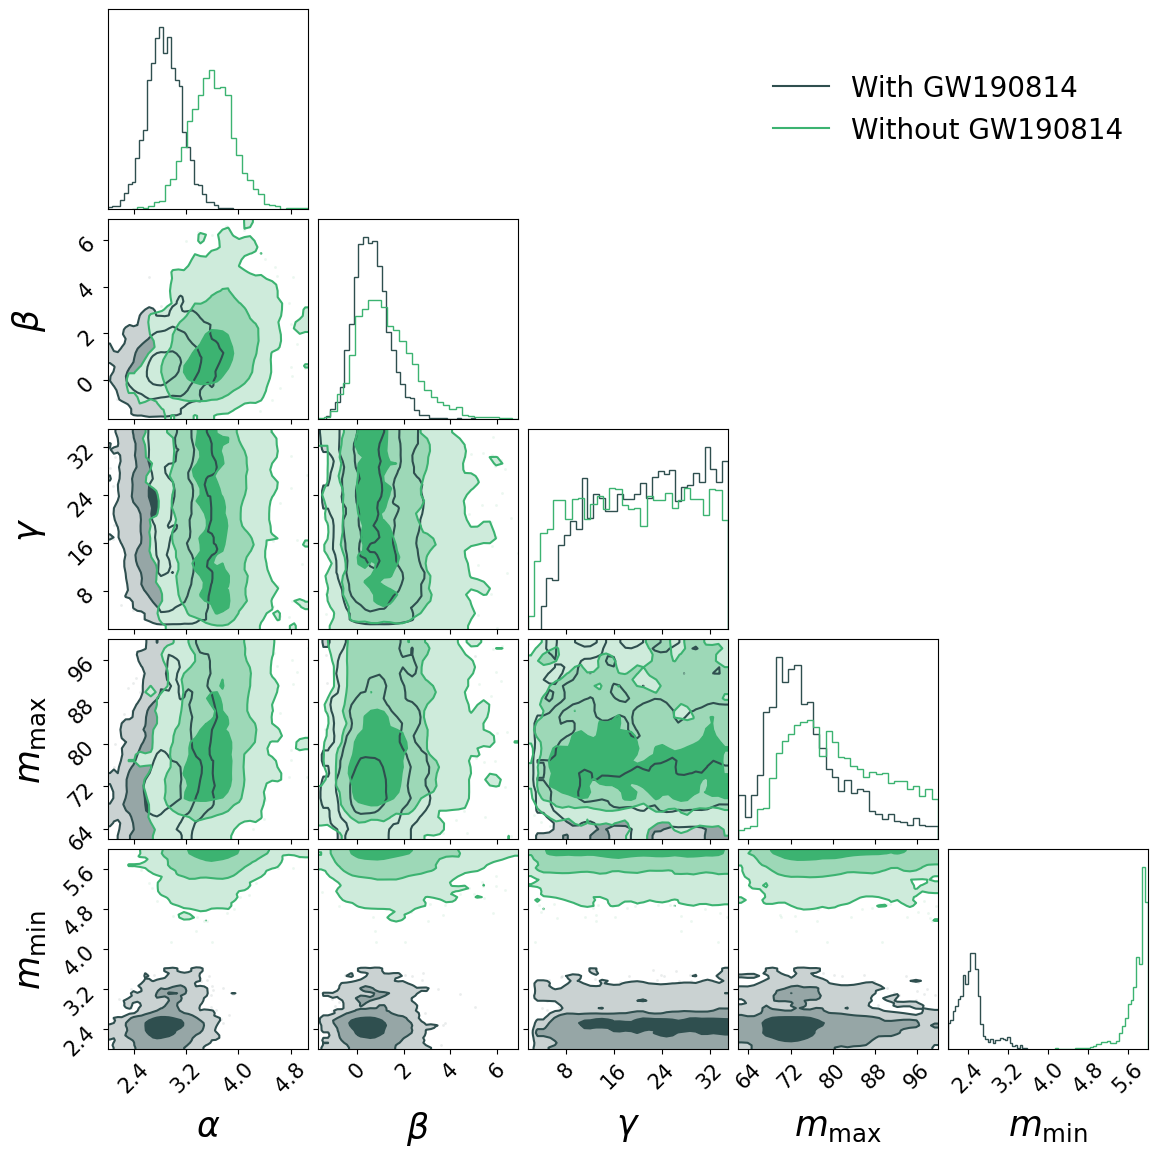

In [55]:
plt.rcParams.update({'font.size': 15})
colors=['darkslategrey', 'mediumseagreen']
labels=['With GW190814', 'Without GW190814']
fig = corner.corner(PL_result_dict,  **corner_kwargs)
corner.corner(PL_no190814_result_dict, fig=fig, **no190814corner_kwargs)
plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=labels[i])
            for i in range(2)
        ],
        fontsize=20, frameon=False,
        bbox_to_anchor=(1, 5), loc="upper right"
    )

In [49]:
corner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color="darkslateblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=False,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\alpha$',r'$\beta$',r'$\gamma$', r'$m_{\rm max}$', r'$m_{\rm min}$', r'$\zeta$'],
)

no190814corner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color="mediumorchid",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=False,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=16),
    labels=[r'$\alpha$',r'$\beta$',r'$\gamma$', r'$m_{\rm max}$', r'$m_{\rm min}$', r'$\zeta$'],
)

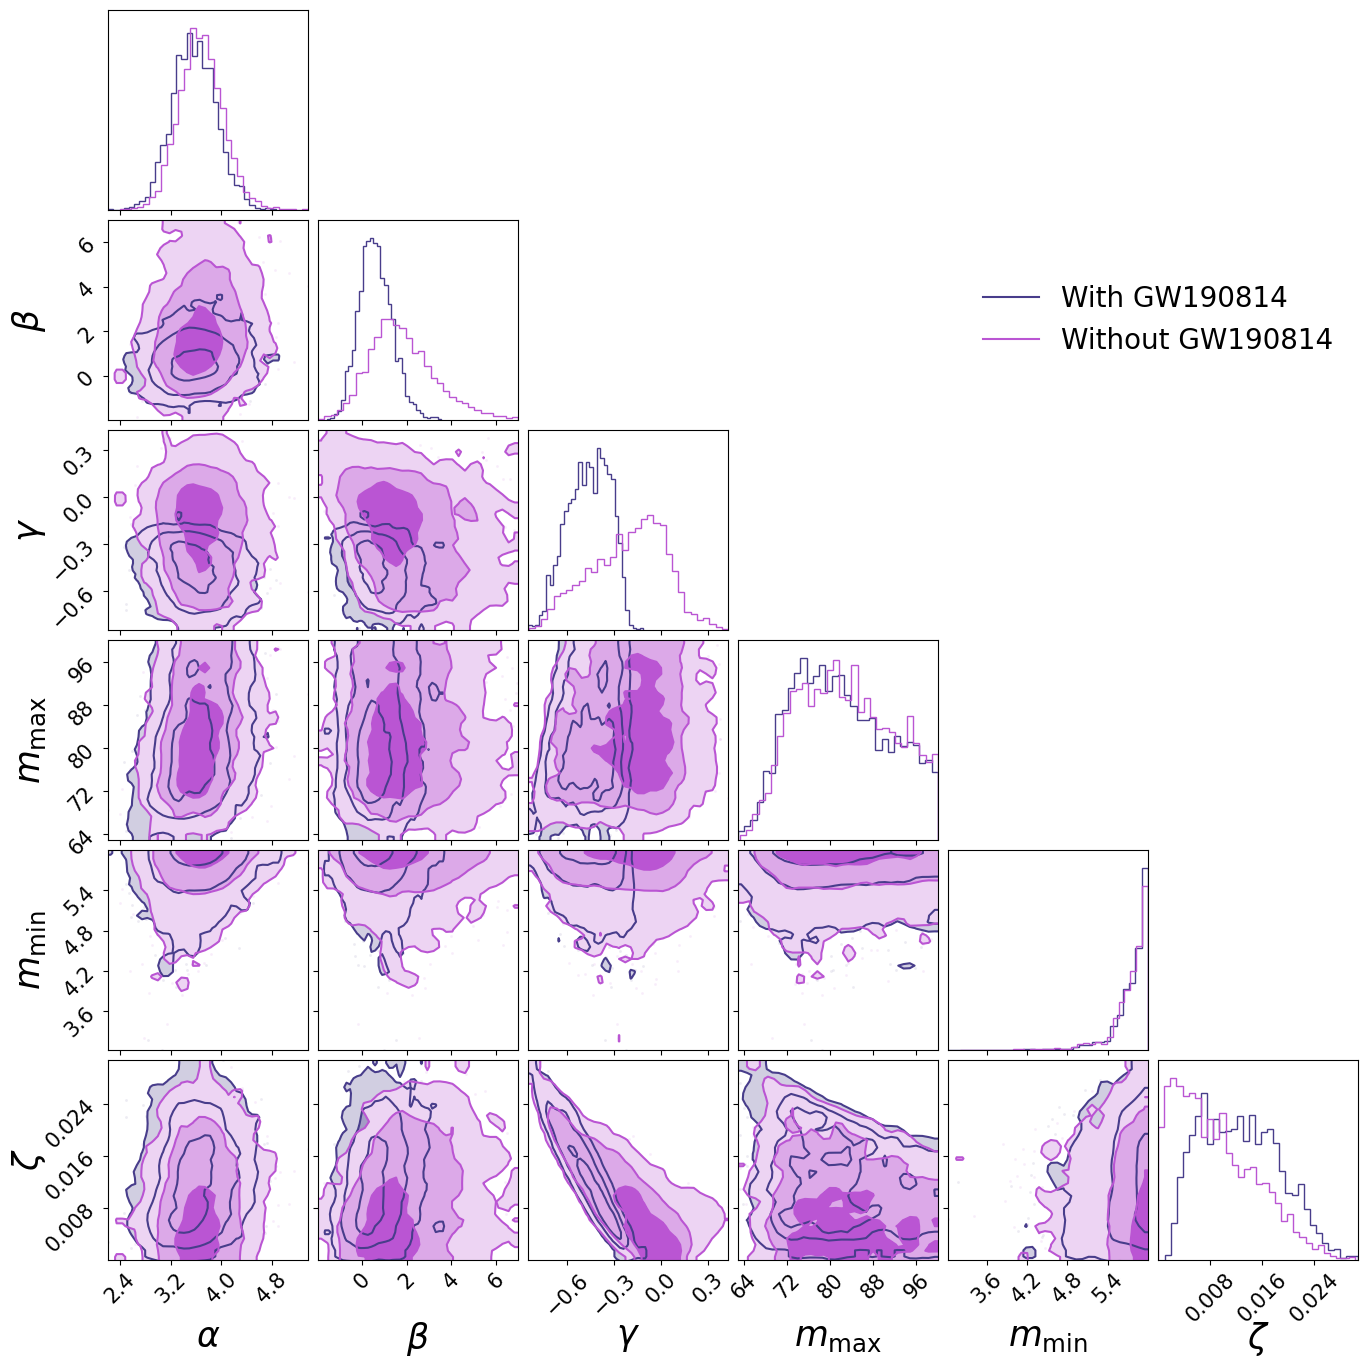

In [50]:
plt.rcParams.update({'font.size': 15})
colors=['darkslateblue', 'mediumorchid']
labels=['With GW190814', 'Without GW190814']
fig = corner.corner(parabola_result_dict, **corner_kwargs)
corner.corner(parabola_no190814_result_dict, fig=fig, **no190814corner_kwargs)
plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=labels[i])
            for i in range(2)
        ],
        fontsize=20, frameon=False,
        bbox_to_anchor=(1, 5), loc="upper right"
    )

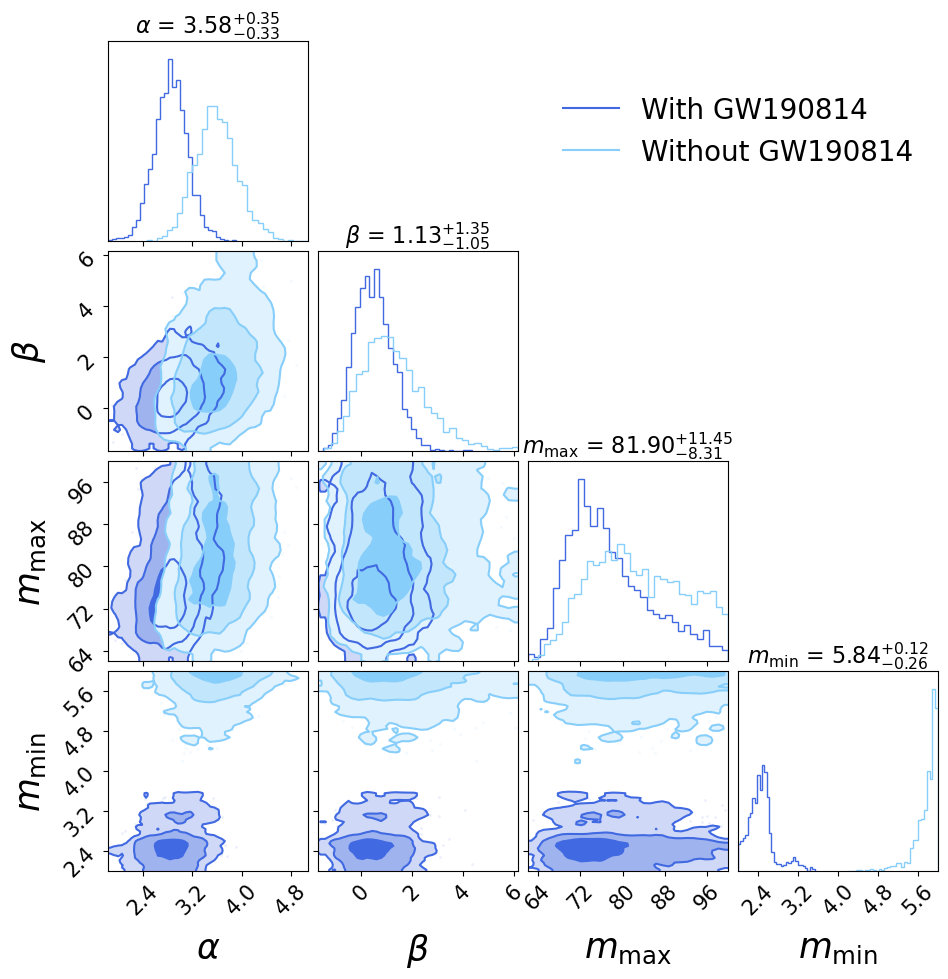

In [62]:
plt.rcParams.update({'font.size': 15})
colors=['royalblue', 'lightskyblue']
labels=['With GW190814', 'Without GW190814']
corner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color=colors[0],
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=False,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\alpha$',r'$\beta$', r'$m_{\rm max}$', r'$m_{\rm min}$'],
)

no190814corner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color=colors[1],
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=16),
    labels=[r'$\alpha$',r'$\beta$', r'$m_{\rm max}$', r'$m_{\rm min}$'],
)
fig = corner.corner(PLPP_result_dict,  **corner_kwargs)
corner.corner(PLPP_no190814_result_dict, fig=fig, **no190814corner_kwargs)
plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=labels[i])
            for i in range(2)
        ],
        fontsize=20, frameon=False,
        bbox_to_anchor=(1, 4), loc="upper right"
    )

In [83]:
def PL_m2min_m1(mass1, mmax, mmin, gamma):
    m2min = (mmax-mmin)*(((mass1-mmin)/(mmax-mmin))**gamma)+mmin
    m2min[m2min>mmax]=np.nan
    return m2min
    
def parabola_m2min_m1(mass1, mmax, mmin, gamma, zeta):
    m2min = mmin + gamma*(mass1 - mmin) + zeta * (mass1 - mmin)**2
    m2min[m2min>mmax]=np.nan
    return m2min


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$m_2^{\\rm min}$')

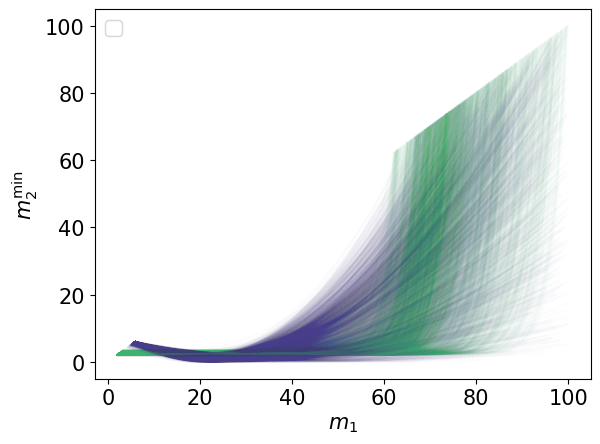

In [31]:
for i in range(2422):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL, color='mediumseagreen', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(2., 100.,1000)
#plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,0.,0.,0.), color='darkslateblue', ls='dashed',\
#         linewidth=2., label='Parabola prior')
#plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.), color='teal', ls='dashed', label='PL prior')
plt.legend()
#dummy, = plt.plot(x[0], y[0], color='black', linestyle='solid')
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2^{\rm min}$')

In [36]:
mass1_parabola = np.linspace(parabola_result_dict['mmin'], parabola_result_dict['mmax'],1000)
mass1_array=np.swapaxes(np.linspace(parabola_result_dict['mmin'], parabola_result_dict['mmax'],1000),0,1)
m2min_parabola = parabola_m2min_m1(mass1_array, np.reshape(parabola_result_dict['mmax'],(-1,1)), np.reshape(parabola_result_dict['mmin'],(-1,1)),\
                     np.reshape(parabola_result_dict['gamma'],(-1,1)), np.reshape(parabola_result_dict['zeta'],(-1,1)))

mass1_parabola_no190814 = np.linspace(parabola_no190814_result_dict['mmin'], parabola_no190814_result_dict['mmax'],1000)
mass1_array_no190814=np.swapaxes(np.linspace(parabola_no190814_result_dict['mmin'], parabola_no190814_result_dict['mmax'],1000),0,1)
m2min_parabola_no190814 = parabola_m2min_m1(mass1_array_no190814, np.reshape(parabola_no190814_result_dict['mmax'],(-1,1)), np.reshape(parabola_no190814_result_dict['mmin'],(-1,1)),\
                     np.reshape(parabola_no190814_result_dict['gamma'],(-1,1)), np.reshape(parabola_no190814_result_dict['zeta'],(-1,1)))

Text(0, 0.5, '$m_2^{\\rm min} ~/ \\mathrm{M}_{\\odot}$')

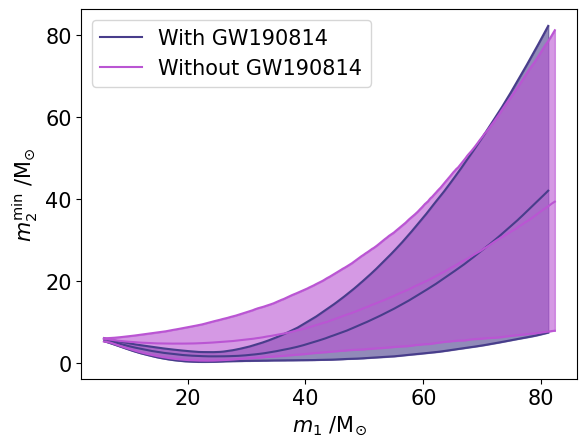

In [41]:
colors=['darkslateblue', 'mediumorchid']
labels=['With GW190814', 'Without GW190814']

plt.plot(np.median(mass1_array, axis=0),np.percentile(m2min_parabola, q=5, axis=0), color='darkslateblue')
plt.plot(np.median(mass1_array, axis=0),np.percentile(m2min_parabola, q=95, axis=0), color='darkslateblue')
plt.plot(np.median(mass1_array, axis=0),np.median(m2min_parabola, axis=0), color='darkslateblue', label='With GW190814')
plt.fill_between(np.median(mass1_array, axis=0), np.percentile(m2min_parabola, q=5, axis=0)\
                 ,np.percentile(m2min_parabola, q=95, axis=0), color='darkslateblue', alpha=0.6)

plt.plot(np.median(mass1_array_no190814, axis=0),np.percentile(m2min_parabola_no190814, q=5, axis=0), color=colors[1])
plt.plot(np.median(mass1_array_no190814, axis=0),np.percentile(m2min_parabola_no190814, q=95, axis=0), color=colors[1])
plt.plot(np.median(mass1_array_no190814, axis=0),np.median(m2min_parabola_no190814, axis=0), color=colors[1], label='Without GW190814')
plt.fill_between(np.median(mass1_array_no190814, axis=0), np.percentile(m2min_parabola_no190814, q=5, axis=0)\
                 ,np.percentile(m2min_parabola_no190814, q=95, axis=0), color=colors[1], alpha=0.6)

plt.legend()
plt.xlabel(r'$m_1 ~/ \mathrm{M}_{\odot}$')
plt.ylabel(r'$m_2^{\rm min} ~/ \mathrm{M}_{\odot}$')

In [84]:
mass1_arry = np.linspace(2., 100.,1000)
m2min_parabola = [parabola_m2min_m1(mass1_array, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i]) for i in range(len(parabola_result_dict['mmax']))]
m2min_parabola_no190814 = [parabola_m2min_m1(mass1_array, parabola_no190814_result_dict['mmax'][i], parabola_no190814_result_dict['mmin'][i],\
                     parabola_no190814_result_dict['gamma'][i], parabola_no190814_result_dict['zeta'][i]) for i in range(len(parabola_no190814_result_dict['mmax']))]

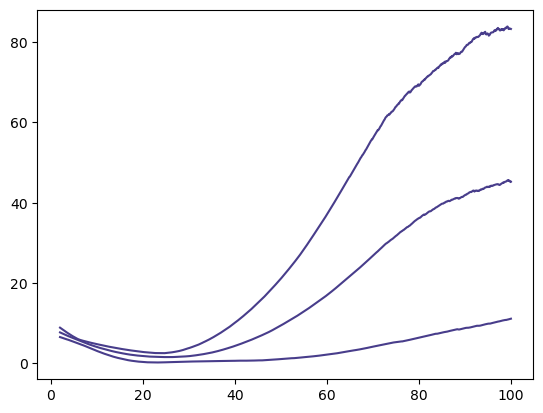

In [87]:

plt.plot(mass1_arry,np.nanpercentile(m2min_parabola, q=5, axis=0), color='darkslateblue')
plt.plot(mass1_arry,np.nanpercentile(m2min_parabola, q=95, axis=0), color='darkslateblue')
plt.plot(mass1_arry,np.nanmedian(m2min_parabola, axis=0), color='darkslateblue', label='With GW190814')

In [11]:
mass1_PL = np.linspace(PL_result_dict['mmin'], PL_result_dict['mmax'],1000)
mass1_array=np.swapaxes(np.linspace(PL_result_dict['mmin'], PL_result_dict['mmax'],1000),0,1)
m2min_PL = PL_m2min_m1(mass1_array, np.reshape(PL_result_dict['mmax'],(-1,1)), np.reshape(PL_result_dict['mmin'],(-1,1)),\
                     np.reshape(PL_result_dict['gamma'],(-1,1)))

mass1_PL_no190814 = np.linspace(PL_no190814_result_dict['mmin'], PL_no190814_result_dict['mmax'],1000)
mass1_array_no190814=np.swapaxes(np.linspace(PL_no190814_result_dict['mmin'], PL_no190814_result_dict['mmax'],1000),0,1)
m2min_PL_no190814 = PL_m2min_m1(mass1_array_no190814, np.reshape(PL_no190814_result_dict['mmax'],(-1,1)), np.reshape(PL_no190814_result_dict['mmin'],(-1,1)),\
                     np.reshape(PL_no190814_result_dict['gamma'],(-1,1)))

Text(0, 0.5, '$m_2^{\\rm min} ~/ \\mathrm{M}_{\\odot}$')

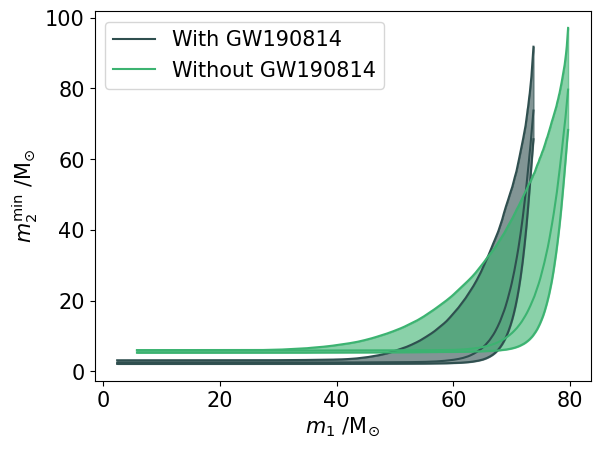

In [53]:

colors=['darkslategrey','mediumseagreen']
labels=['With GW190814', 'Without GW190814']

plt.plot(np.median(mass1_array, axis=0),np.percentile(m2min_PL, q=5, axis=0), color=colors[0])
plt.plot(np.median(mass1_array, axis=0),np.percentile(m2min_PL, q=95, axis=0), color=colors[0])
plt.plot(np.median(mass1_array, axis=0),np.median(m2min_PL, axis=0), color=colors[0], label=labels[0])
plt.fill_between(np.median(mass1_array, axis=0), np.percentile(m2min_PL, q=5, axis=0)\
                 ,np.percentile(m2min_PL, q=95, axis=0), color=colors[0], alpha=0.6)

plt.plot(np.median(mass1_array_no190814, axis=0),np.percentile(m2min_PL_no190814, q=5, axis=0), color=colors[1])
plt.plot(np.median(mass1_array_no190814, axis=0),np.percentile(m2min_PL_no190814, q=95, axis=0), color=colors[1])
plt.plot(np.median(mass1_array_no190814, axis=0),np.median(m2min_PL_no190814, axis=0), color=colors[1], label=labels[1])
plt.fill_between(np.median(mass1_array_no190814, axis=0), np.percentile(m2min_PL_no190814, q=5, axis=0)\
                 ,np.percentile(m2min_PL_no190814, q=95, axis=0), color=colors[1], alpha=0.6)
plt.legend()
plt.xlabel(r'$m_1 ~/ \mathrm{M}_{\odot}$')
plt.ylabel(r'$m_2^{\rm min} ~/ \mathrm{M}_{\odot}$')

In [74]:
mass1_arry = np.linspace(2., 100.,1000)
m2min_PL = [PL_m2min_m1(mass1_array, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i]) for i in range(len(PL_result_dict['mmax']))]
m2min_PL_no190814 = [PL_m2min_m1(mass1_array, PL_no190814_result_dict['mmax'][i], PL_no190814_result_dict['mmin'][i],\
                     PL_no190814_result_dict['gamma'][i]) for i in range(len(PL_no190814_result_dict['mmax']))]

/tmp/ipykernel_2862982/133766630.py:2: RuntimeWarning: invalid value encountered in power
  m2min = (mmax-mmin)*(((mass1-mmin)/(mmax-mmin))**gamma)+mmin


Text(0, 0.5, '$m_2^{\\rm min} ~/ \\mathrm{M}_{\\odot}$')

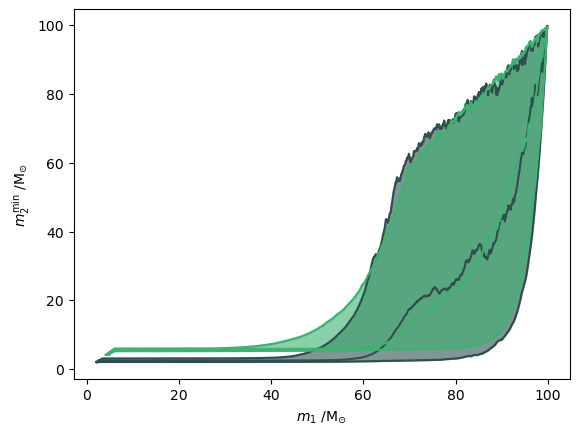

In [78]:
plt.plot(mass1_array,np.nanpercentile(m2min_PL,q=5,axis=0), color='darkslategrey')
plt.plot(mass1_array,np.nanpercentile(m2min_PL,q=95,axis=0), color='darkslategrey')
plt.plot(mass1_array,np.nanpercentile(m2min_PL,q=50,axis=0), color='darkslategrey')
plt.fill_between(mass1_array, np.nanpercentile(m2min_PL, q=5, axis=0)\
                 ,np.nanpercentile(m2min_PL, q=95, axis=0), color='darkslategrey', alpha=0.6)

plt.plot(mass1_array,np.nanpercentile(m2min_PL_no190814,q=5,axis=0), color='mediumseagreen')
plt.plot(mass1_array,np.nanpercentile(m2min_PL_no190814,q=95,axis=0), color='mediumseagreen')
plt.plot(mass1_array,np.nanpercentile(m2min_PL_no190814,q=50,axis=0), color='mediumseagreen')
plt.fill_between(mass1_array, np.nanpercentile(m2min_PL_no190814, q=5, axis=0)\
                 ,np.nanpercentile(m2min_PL_no190814, q=95, axis=0), color='mediumseagreen', alpha=0.6)

plt.xlabel(r'$m_1 ~/ \mathrm{M}_{\odot}$')
plt.ylabel(r'$m_2^{\rm min} ~/ \mathrm{M}_{\odot}$')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$q_{\\rm min}$')

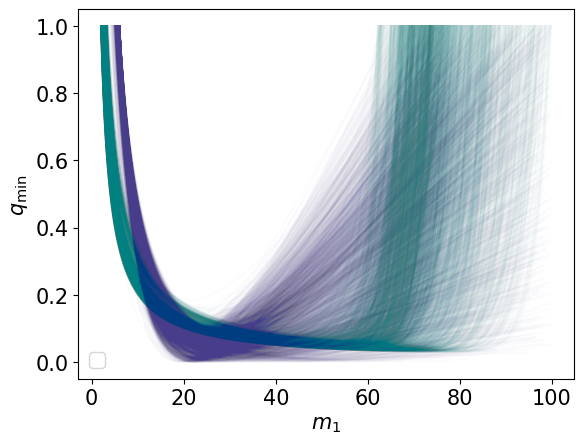

In [61]:
for i in range(2422):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL/mass1_PL, color='teal', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola/mass1_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(3.5, 100.,1000)
#plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,0.,0.,0.)/mass1_prior, color='darkslateblue',\
#         ls='dashed', linewidth=2., label='Parabola prior')
#plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.)/mass1_prior, color='teal', ls='dashed', label='PL prior')
plt.legend()
plt.xlabel(r'$m_1$')
plt.ylabel(r'$q_{\rm min}$')

/cvmfs/software.igwn.org/conda/envs/igwn/lib/python3.10/site-packages/corner/core.py:795: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X2, Y2, H2.T, V, **contour_kwargs)


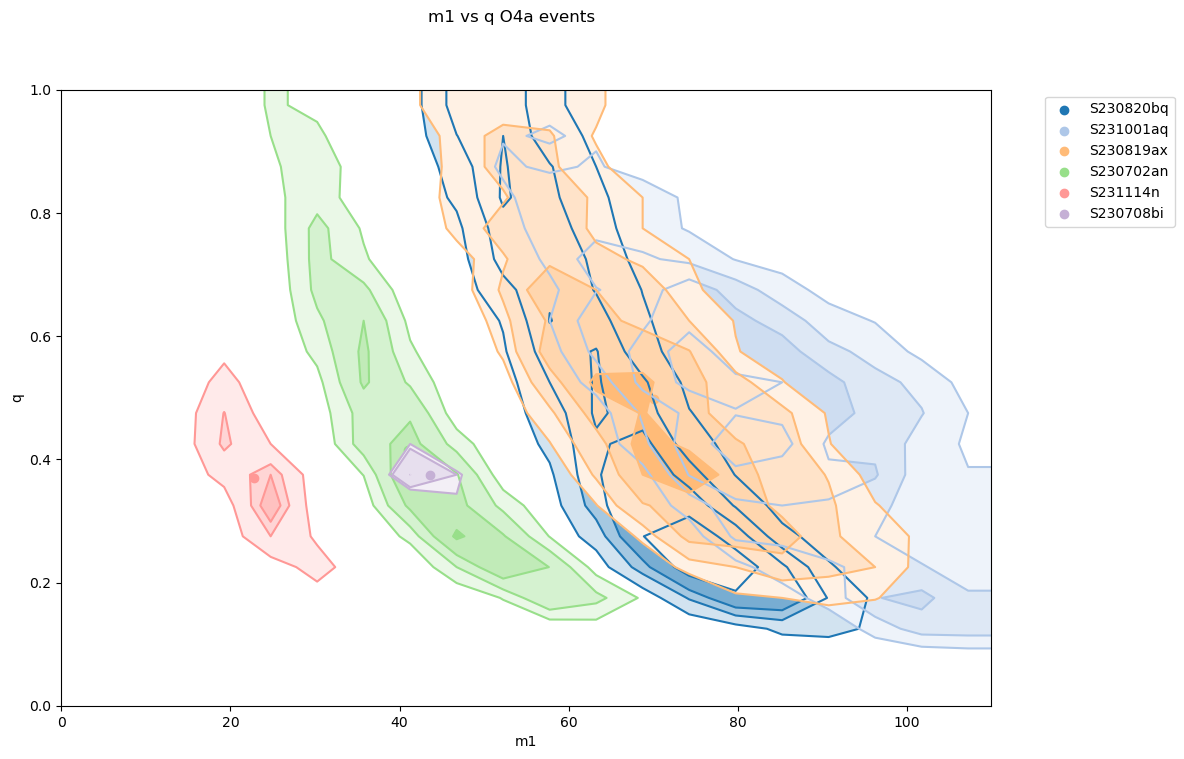

In [77]:
cmap = plt.colormaps['tab20']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 12))
i=0
plt.rcParams["figure.figsize"] = (12,8)

#plot events
for filename in glob.glob("m1_q_event_samples/S*.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    eventname = (os.path.basename(filename)).split('.')[0]
    if np.median(q)<0.5:
        corner.hist2d(np.array(mass1),np.array(q), fill_contours=True, plot_density=False,\
                  range=[(0,110), (0,1)], plot_datapoints=False, color=colors[i], contour_kwargs={'label':f'{eventname}'})
        plt.scatter(np.median(mass1),np.median(q), color=colors[i], label=f'{eventname}')
        i+=1

"""
#plot variable qmin model samps
for i in np.random.choice(14732,3000):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL/mass1_PL, color='teal', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola/mass1_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(3.5, 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,2.,0.,0.)/mass1_prior, color='darkslateblue',\
         ls='dashed', linewidth=2., label='Parabola prior')
plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.)/mass1_prior, color='teal', ls='dashed', label='PL prior')
"""

plt.xlabel('m1')
plt.ylabel('q')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.suptitle('m1 vs q O4a events')
plt.savefig('m1_vs_q_O4a_events_nomodels.pdf', bbox_inches='tight')

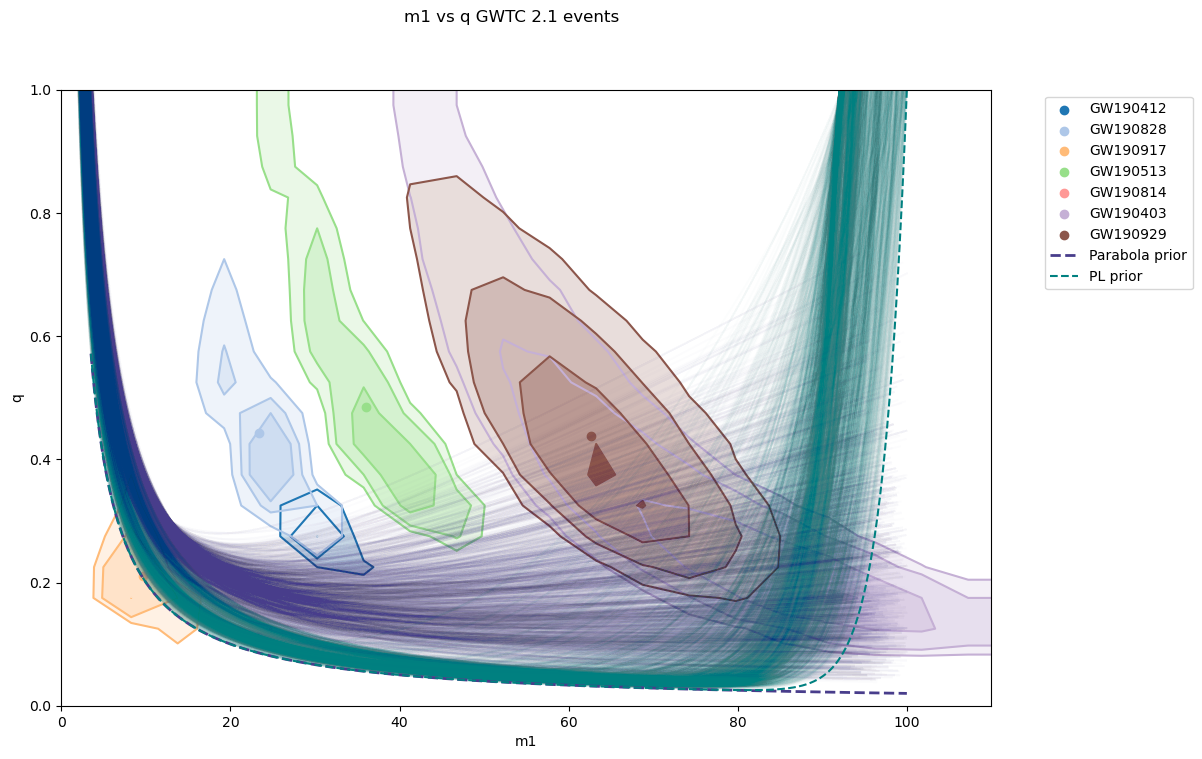

In [79]:
cmap = plt.colormaps['tab20']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 12))
i=0

for filename in glob.glob("m1_q_event_samples/IGWN-GWTC2p1*.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    
    eventname = (os.path.basename(filename))[16:24]
    if np.median(q)<0.5:
        corner.hist2d(np.array(mass1),np.array(q), fill_contours=True, plot_density=False,\
                  range=[(0,110), (0,1)], plot_datapoints=False, color=colors[i])
        plt.scatter(np.median(mass1),np.median(q), color=colors[i], label=f'{eventname}')
        i+=1
        
#plot variable qmin model samps
for i in np.random.choice(14732,3000):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL/mass1_PL, color='teal', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola/mass1_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(3.5, 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,2.,0.,0.)/mass1_prior, color='darkslateblue',\
         ls='dashed', linewidth=2., label='Parabola prior')
plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.)/mass1_prior, color='teal', ls='dashed', label='PL prior')


plt.xlabel('m1')
plt.ylabel('q')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.suptitle('m1 vs q GWTC 2.1 events')
plt.savefig('m1_vs_q_GWTC21_events_models.pdf', bbox_inches='tight')

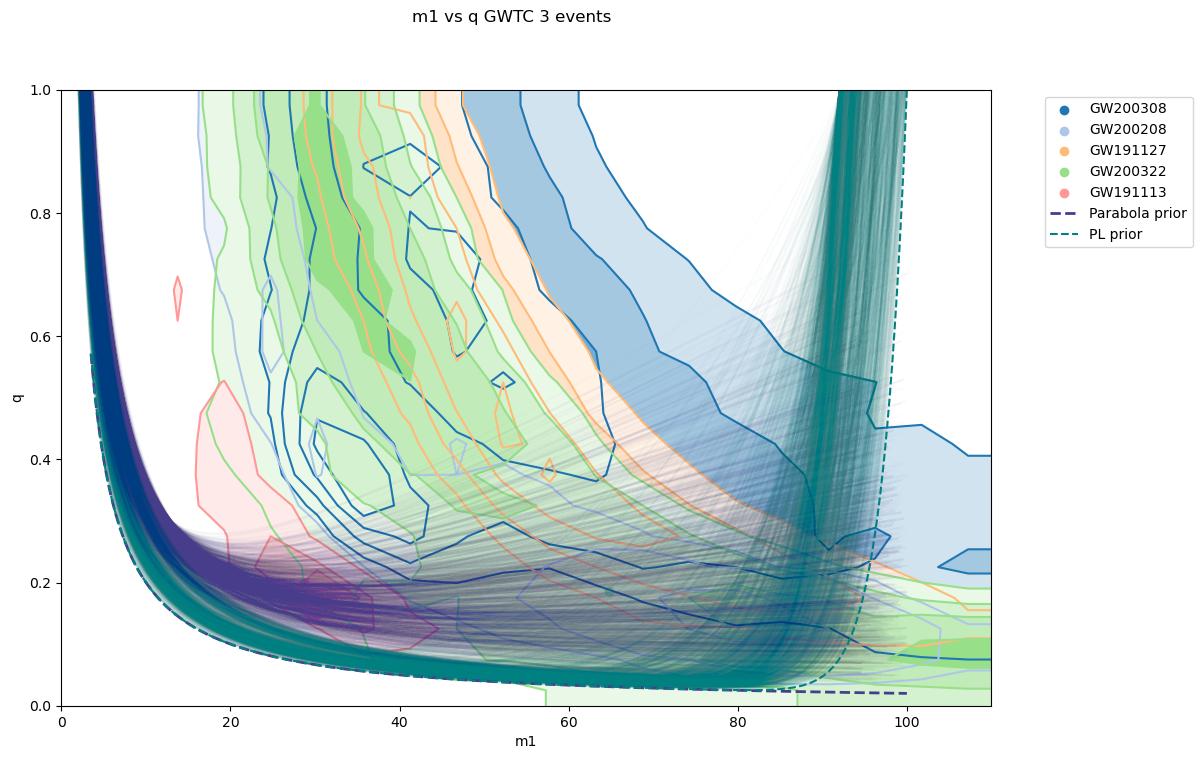

In [80]:
cmap = plt.colormaps['tab20']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 12))
i=0
plt.rcParams["figure.figsize"] = (12,8)


for filename in glob.glob("m1_q_event_samples/IGWN-GWTC3*.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    
    eventname = (os.path.basename(filename))[16:24]
    if np.median(q)<0.5:
        corner.hist2d(np.array(mass1),np.array(q), fill_contours=True, plot_density=False,\
                  range=[(0,110), (0,1)], plot_datapoints=False, color=colors[i])
        plt.scatter(np.median(mass1),np.median(q), color=colors[i], label=f'{eventname}')
        i+=1

#plot variable qmin model samps
for i in np.random.choice(14732,3000):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL/mass1_PL, color='teal', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola/mass1_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(3.5, 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,2.,0.,0.)/mass1_prior, color='darkslateblue',\
         ls='dashed', linewidth=2., label='Parabola prior')
plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.)/mass1_prior, color='teal', ls='dashed', label='PL prior')

plt.xlabel('m1')
plt.ylabel('q')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.suptitle('m1 vs q GWTC 3 events')
plt.savefig('m1_vs_q_GWTC_3_events_models.pdf', bbox_inches='tight')